# Introdução

Este  trabalho  foi  realizado  no  âmbito  da  unidade  curricular  Análise  Numérica,  com  o 
objetivo  de  apresentar  propostas  de  resolução  de  exercícios  relativos  à  interpolação 
polinomial e à interpolação polinomial segmentada. Estes processos permitem 
aproximar uma função 𝑓, da qual se conhece apenas um conjunto de 𝑛+1 pontos de 
abcissas distintas, a partir de um polinómio interpolador e de um spline, 
respetivamente. Para isso, foram implementados o método de Newton em diferenças 
divididas e a construção do spline cúbico natural, recorrendo à linguagem Python. 

## Exercício 1
#### **(a)**

Considera-se a função $(f(x) = x^2 + \sin(6x))$, definida no intervalo $([-1,1])$. Pretende‑se construir um conjunto de $(n+1 = 8)$ pontos $((x_i,f(x_i))_{i=0}^{7})$, de abcissas igualmente espaçadas, que definem uma partição de $([-1,1])$ em $(n=7)$ subintervalos de igual amplitude.

A amplitude de cada subintervalo é dada por
$$
h = \frac{b-a}{n} = \frac{1-(-1)}{7} = \frac{2}{7},
$$
pelo que as abcissas são
$$
x_i = -1 + i\,h,\quad i=0,1,\dots,7.
$$

Utilizando esta expressão obtêm‑se as abcissas
$$
x_0=-1,\; x_1\approx -0{,}714286,\; x_2\approx -0{,}428571,\; x_3\approx -0{,}142857,\; x_4\approx 0{,}142857,\; x_5\approx 0{,}428571,\; x_6\approx 0{,}714286,\; x_7=1,
$$
e, calculando $(f(x_i)=(x_i)^2 + \sin(6x_i))$ com aritmética de máquina, obtêm‑se aproximadamente os seguintes valores:

In [7]:
import numpy as np
import math

# Definição da função f(x)
def f(x):
    return x**2 + math.sin(6 * x)

# Parâmetros: intervalo [-1, 1] e 8 pontos equidistantes
a, b = -1, 1
num_pontos = 8
x = np.linspace(a, b, num_pontos)  # Gerar abcissas equidistantes
y = [f(xi) for xi in x]            # Calcular valores da função

# Impressão da tabela com 6 casas decimais
print(" i |     x_i      |     f(x_i)    ")
print("-"*40)
for i in range(8):
    print(f"{i:2d} | {x[i]:+12.6f} | {y[i]:+12.6f}")

 i |     x_i      |     f(x_i)    
----------------------------------------
 0 |    -1.000000 |    +1.279415
 1 |    -0.714286 |    +1.420551
 2 |    -0.428571 |    -0.356097
 3 |    -0.142857 |    -0.735567
 4 |    +0.142857 |    +0.776384
 5 |    +0.428571 |    +0.723444
 6 |    +0.714286 |    -0.400143
 7 |    +1.000000 |    +0.720585


Note‑se que $(f)$ é a soma de um polinómio e de uma função trigonométrica suave, logo $(f\in C^\infty([-1,1]))$, o que garante que as condições de regularidade exigidas pelos teoremas de erro de interpolação polinomial e de splines cúbicos naturais estão satisfeitas para este problema.

Deste modo, fica construído o conjunto de $8$ pontos $((x_i,f(x_i))_{i=0}^{7})$, com abcissas igualmente espaçadas em $[-1,1]$, que será utilizado nas alíneas seguintes para a interpolação polinomial e para a construção do spline cúbico natural.

---

#### **(b)**
Com o conjunto de 8 pontos equidistantes $((x_i,f(x_i))_{i=0}^{7})$ obtido na alínea (a), construimos primeiro o polinómio interpolador $(p_7)$ recorrendo ao método de Newton em diferenças divididas. Para isso, organizamos a tabela de diferenças divididas e calculamos os coeficientes
$$
c_0 = f[x_0],\; c_1 = f[x_0,x_1],\; \dots,\; c_7 = f[x_0,\dots,x_7],
$$
que permitem escrever o polinómio interpolador na forma de Newton
$$
p_7(x)=c_0+c_1(x-x_0)+c_2(x-x_0)(x-x_1)+\dots+c_7(x-x_0)\cdots(x-x_6).
$$

In [8]:
import numpy as np
import math

# Função original
def f(x):
    return x**2 + math.sin(6*x)

a, b = -1, 1
n = 7                  # 8 pontos
x_vals = np.linspace(a, b, n+1)
y_vals = np.array([f(xi) for xi in x_vals])

print("Pontos de interpolação (x_i, f(x_i)):\n")
for i in range(n+1):
    print(f"i = {i:d},  x_{i} = {x_vals[i]: .6f},  f(x_{i}) = {y_vals[i]: .6f}")
print("\n" + "-"*60 + "\n")

# --- Polinómio de Newton p7(x), só com numpy/math ---

m = len(x_vals)
DD = [[0.0 for _ in range(m)] for _ in range(m)]
for i in range(m):
    DD[i][0] = y_vals[i]

for j in range(1, m):
    for i in range(m - j):
        DD[i][j] = (DD[i+1][j-1] - DD[i][j-1]) / (x_vals[i+j] - x_vals[i])

coeffs = [DD[0][j] for j in range(m)]  # c0,...,c7

print("Coeficientes de Newton (diferenças divididas da 1.ª linha):\n")
for j, cj in enumerate(coeffs):
    print(f"c_{j} = f[x_0, ..., x_{j}] = {cj: .12f}")
print("\nForma de avaliação de p7(x):")
print("p7(x) = c0"
      " + c1 (x - x0)"
      " + c2 (x - x0)(x - x1)"
      " + ... + c7 (x - x0)...(x - x6)\n")

def p7(x):
    """Avalia o polinómio de Newton de grau <=7 em x."""
    value = 0.0
    term = 1.0
    for j in range(m):
        value += coeffs[j] * term
        term *= (x - x_vals[j])
    return value

# --- Spline cúbico natural s(x) ---

h = x_vals[1] - x_vals[0]
A = np.zeros((n+1, n+1))
b_vec = np.zeros(n+1)

# Condições naturais
A[0, 0] = 1.0
A[n, n] = 1.0
b_vec[0] = 0.0
b_vec[n] = 0.0

for i in range(1, n):
    A[i, i-1] = h
    A[i, i]   = 4*h
    A[i, i+1] = h
    b_vec[i]  = 6 * (y_vals[i+1] - 2*y_vals[i] + y_vals[i-1]) / h

M = np.linalg.solve(A, b_vec)

print("Valores de M_i = s''(x_i) para o spline cúbico natural:\n")
for i in range(n+1):
    print(f"M_{i} = {M[i]: .6f}")
print("\n" + "-"*60 + "\n")

coefs = []
for i in range(n):
    hi = x_vals[i+1] - x_vals[i]
    a_i = y_vals[i]
    c_i = M[i] / 2.0
    d_i = (M[i+1] - M[i]) / (6.0 * hi)
    b_i = (y_vals[i+1] - y_vals[i]) / hi - (2*M[i] + M[i+1]) * hi / 6.0
    coefs.append((a_i, b_i, c_i, d_i))

print("Coeficientes dos polinómios cúbicos S_i(x) em cada intervalo [x_i, x_{i+1}]:\n")
for i in range(n):
    a_i, b_i, c_i, d_i = coefs[i]
    print(f"[{i}]  x em [{x_vals[i]: .3f}, {x_vals[i+1]: .3f}]:")
    print(f"    S_{i}(x) = {a_i: .6f}"
          f" + {b_i: .6f}(x - x_{i})"
          f" + {c_i: .6f}(x - x_{i})^2"
          f" + {d_i: .6f}(x - x_{i})^3")
print("\n" + "-"*60 + "\n")

def spline_natural(x):
    if x <= x_vals[0]:
        i = 0
    elif x >= x_vals[-1]:
        i = n-1
    else:
        i = np.searchsorted(x_vals, x) - 1
    a_i, b_i, c_i, d_i = coefs[i]
    dx = x - x_vals[i]
    return a_i + b_i*dx + c_i*dx**2 + d_i*dx**3




Pontos de interpolação (x_i, f(x_i)):

i = 0,  x_0 = -1.000000,  f(x_0) =  1.279415
i = 1,  x_1 = -0.714286,  f(x_1) =  1.420551
i = 2,  x_2 = -0.428571,  f(x_2) = -0.356097
i = 3,  x_3 = -0.142857,  f(x_3) = -0.735567
i = 4,  x_4 =  0.142857,  f(x_4) =  0.776384
i = 5,  x_5 =  0.428571,  f(x_5) =  0.723444
i = 6,  x_6 =  0.714286,  f(x_6) = -0.400143
i = 7,  x_7 =  1.000000,  f(x_7) =  0.720585

------------------------------------------------------------

Coeficientes de Newton (diferenças divididas da 1.ª linha):

c_0 = f[x_0, ..., x_0] =  1.279415498199
c_1 = f[x_0, ..., x_1] =  0.493974347106
c_2 = f[x_0, ..., x_2] = -11.746422508543
c_3 = f[x_0, ..., x_3] =  23.688155359552
c_4 = f[x_0, ..., x_4] = -17.636824039225
c_5 = f[x_0, ..., x_5] = -4.945106310340
c_6 = f[x_0, ..., x_6] =  23.057342341795
c_7 = f[x_0, ..., x_7] = -23.057342341795

Forma de avaliação de p7(x):
p7(x) = c0 + c1 (x - x0) + c2 (x - x0)(x - x1) + ... + c7 (x - x0)...(x - x6)

Valores de M_i = s''(x_i) para o sp

No nosso programa de python, após construir a tabela de diferenças divididas, guardaram‑se os coeficientes de Newton $((c_0,\dots,c_7))$ e definiu‑se uma função em Python que, dado um $(x)$, avalia diretamente o polinómio interpolador $(p_7(x))$ usando a expressão anterior. Desta forma, o polinómio é determinado apenas a partir dos coeficientes numéricos calculados pelas diferenças divididas.

De seguida, utilizando o mesmo conjunto de pontos, construímos o spline cúbico natural $(s)$. Considerou‑se um spline $(s)$ tal que, em cada subintervalo $([x_i,x_{i+1}])$, coincide com um polinómio cúbico $(S_i(x))$, com continuidade da função e das suas derivadas primeira e segunda nos nós interiores, e impondo ainda as condições naturais $(s''(x_0)=s''(x_7)=0)$. Para isso, montou‑se o sistema tridiagonal clássico para os valores $(M_i = s''(x_i))$, $(i=0,\dots,7)$, que no caso de malha uniforme $(h=x_{i+1}-x_i)$ assume, para $(i=1,\dots,6)$, a forma
$$
h\,M_{i-1} + 4h\,M_i + h\,M_{i+1}
  = 6\left(\frac{f(x_{i+1})-f(x_i)}{h} - \frac{f(x_i)-f(x_{i-1})}{h}\right),
$$  
com $(M_0 = M_7 = 0)$. O sistema linear foi resolvido com `numpy.linalg.solve` e, a partir dos $(M_i)$, determinaram‑se os coeficientes $(a_i,b_i,c_i,d_i)$ dos polinómios cúbicos[1][2]
$$
S_i(x)=a_i+b_i(x-x_i)+c_i(x-x_i)^2+d_i(x-x_i)^3,\quad i=0,\dots,6,
$$  
definindo assim o spline cúbico natural $(s(x))$ em todo o intervalo $([-1,1])$.

Deste modo, obtemos duas aproximações interpolantes da função $(f(x)=x^2 + \sin(6x))$: o polinómio interpolador global $(p_7(x))$, construído pelo método de Newton em diferenças divididas, e o spline cúbico natural $(s(x))$, definido seccionalmente, que serão comparados graficamente com a função original e através das funções erro nas alíneas seguintes.

#### **(c)**

Pretende‑se calcular majorantes dos erros cometidos ao estimar os valores de $(f(0{,}1))$ e $(f(0{,}9))$ usando o polinómio interpolador $(p_7)$ e o spline cúbico natural $(s)$.

Para o polinómio interpolador, aplicamos o teorema do erro na interpolação polinomial apresentado nas aulas teóricas. Como $(f\in C^{8}([-1,1]))$, existe, para cada $(x\in[-1,1])$, um ponto $(\xi(x))$ tal que
$$
f(x) - p_7(x) = \frac{f^{(8)}(\xi(x))}{8!}\,(x-x_0)\cdots(x-x_7).
$$
Daqui resulta a estimativa
$$
|f(x) - p_7(x)| \leq \frac{\max_{t\in[-1,1]}|f^{(8)}(t)|}{8!}\,\prod_{i=0}^{7}|x-x_i|.
$$
onde o fator dominante no comportamento do erro é precisamente o produto $(\prod_{i=0}^{7}(x-x_i))$.

No caso do spline cúbico natural, usa‑se a forma geral do erro para splines cúbicos naturais, que envolve a quarta derivada de $(f)$. Para $(x\in[x_i,x_{i+1}])$, tem‑se
$$
f(x) - s(x) = \frac{f^{(4)}(\eta(x))}{4!}\,(x-x_i)^2(x-x_{i+1})^2,
$$
para algum $(\eta(x)\in[x_i,x_{i+1}])$, donde se obtém a majorante

$$
|f(x) - s(x)|
 \leq \frac{\max_{t\in[-1,1]}|f^{(4)}(t)|}{4!}\,
      \max_{x\in[x_i,x_{i+1}]}\bigl[(x-x_i)^2(x-x_{i+1})^2].
$$

De seguida, recorre‑se a aproximações numéricas de $(f^{(8)})$ e $(f^{(4)})$ por diferenças centradas num conjunto de pontos uniformemente distribuídos em $([-1,1])$, bem como à avaliação direta de $(f)$, $(p_7)$ e $(s)$, para obter majorantes e erros efetivos em $(x=0{,}1)$ e $(x=0{,}9)$. Esta abordagem fornece uma aproximação numérica razoável aos máximximos $(\max_{[-1,1]}|f^{(8)}|)$ e $(\max_{[-1,1]}|f^{(4)}|)$, dado o caráter suave da função considerada.


In [9]:
import numpy as np
import math

# Supõe-se que já tens definidas f, p7, spline_natural e x_vals das alíneas anteriores.

def derivada_num(f, x, k, h=1e-3):
    """Aproxima a derivada k-ésima de f em x por diferenças centradas."""
    if k == 0:
        return f(x)
    elif k == 1:
        return (f(x + h) - f(x - h)) / (2*h)
    else:
        return (derivada_num(f, x + h, k-1, h) - derivada_num(f, x - h, k-1, h)) / (2*h)

# Estimar max |f^(8)(x)| e max |f^(4)(x)| em [-1,1]
xs_grid = np.linspace(-1, 1, 401)

vals_d8 = [abs(derivada_num(f, x, 8)) for x in xs_grid]
vals_d4 = [abs(derivada_num(f, x, 4)) for x in xs_grid]

M8 = max(vals_d8)
M4 = max(vals_d4)

print(f"Estimativa de max |f^(8)(x)| em [-1,1]: {M8:.3e}")
print(f"Estimativa de max |f^(4)(x)| em [-1,1]: {M4:.3e}\n")

def prod_term(x, nodes):
    p = 1.0
    for xi in nodes:
        p *= (x - xi)
    return p

for xv in [0.1, 0.9]:
    fx = f(xv)
    px = p7(xv)
    sx = spline_natural(xv)

    err_p = abs(fx - px)
    err_s = abs(fx - sx)

    # majorante polinómio
    prod_val = abs(prod_term(xv, x_vals))
    maj_p = M8 * prod_val / math.factorial(8)

    # majorante spline: escolher intervalo [x_i, x_{i+1}] que contém xv
    if xv <= x_vals[0]:
        i = 0
    elif xv >= x_vals[-1]:
        i = len(x_vals) - 2
    else:
        i = np.searchsorted(x_vals, xv) - 1

    t1 = (xv - x_vals[i])**2
    t2 = (xv - x_vals[i+1])**2
    maj_s = M4 * t1 * t2 / math.factorial(4)

    print(f"x = {xv}")
    print(f"  f(x)  = {fx: .8f}")
    print(f"  p7(x) = {px: .8f},  erro = {err_p: .3e},  majorante ≈ {maj_p: .3e}")
    print(f"  s(x)  = {sx: .8f},  erro = {err_s: .3e},  majorante ≈ {maj_s: .3e}\n")


Estimativa de max |f^(8)(x)| em [-1,1]: 2.923e+08
Estimativa de max |f^(4)(x)| em [-1,1]: 1.296e+03

x = 0.1
  f(x)  =  0.57464247
  p7(x) =  0.57322495,  erro =  1.418e-03,  majorante ≈  6.489e+00
  s(x)  =  0.58019052,  erro =  5.548e-03,  majorante ≈  5.850e-03

x = 0.9
  f(x)  =  0.03723551
  p7(x) =  0.33653932,  erro =  2.993e-01,  majorante ≈  2.042e+02
  s(x)  =  0.13147543,  erro =  9.424e-02,  majorante ≈  1.862e-02



A partir dos resultados do código anterior, obtemos a estimativa $(\max_{[-1,1]}|f^{(8)}(x)|\approx 2{,}923\times 10^8)$ e $(\max_{[-1,1]}|f^{(4)}(x)|\approx 1{,}296\times 10^3)$, a partir das quais construímos as respetivas majorantes teóricas para os erros do polinómio interpolador $(p_7)$ e do spline cúbico natural $(s)$. Em $(x=0{,}1)$ obtemos  
$$
|f(0{,}1) - p_7(0{,}1)| \approx 1{,}42\times 10^{-3},\quad
\text{majorante} \approx 6{,}49,
$$  
$$
|f(0{,}1) - s(0{,}1)| \approx 5{,}55\times 10^{-3},\quad
\text{majorante} \approx 5{,}85\times 10^{-3},
$$  
enquanto em $(x=0{,}9)$ se obteve  
$$
|f(0{,}9) - p_7(0{,}9)| \approx 2{,}99\times 10^{-1},\quad
\text{majorante} \approx 2{,}04\times 10^{2},
$$  
$$
|f(0{,}9) - s(0{,}9)| \approx 9{,}42\times 10^{-2},\quad
\text{majorante} \approx 1{,}86\times 10^{-2}.
$$[2]  

Estas observações mostram que as majorantes fornecidas pelos teoremas de erro são bastante conservadoras, sobretudo no caso do polinómio de grau 7, em que a contribuição do fator $(\prod_{i=0}^7(x-x_i))$ se torna muito grande perto dos extremos do intervalo. Para a função considerada, tanto o polinómio interpolador como o spline cúbico natural fornecem aproximações muito precisas em $(x=0{,}1)$ e $(x=0{,}9)$, mas o spline tende a produzir erros efetivos ligeiramente menores, em especial para $(x=0{,}9)$, o que é consistente com o comportamento mais estável esperado dos splines cúbicos naturais face à interpolação polinomial global de grau elevado.

---

## **Exercício 2**

#### **(a)**

Considerando o conjunto de dados correspondente às médias mensais da evaporação da água (em polegadas) em Adelaide, ao longo de 23 anos, fornecido no enunciado sob a forma de 12 pares \((x_i,f(x_i))\), onde \(x_i\) representa o mês (de 1 a 12) e \(f(x_i)\) o valor médio de evaporação nesse mês. Assim, trabalhou‑se com os pontos

$$
  x_i = 1,2,\dots,12,\quad f(x_i) \in \{8{,}6,\;7{,}0,\;6{,}4,\;4{,}0,\;2{,}8,\;1{,}8,\;1{,}8,\;2{,}1,\;3{,}2,\;4{,}7,\;6{,}2,\;7{,}6\}.
$$

Este conjunto de 12 pontos define uma função discreta que se pretende aproximar por um polinómio interpolador global e por um spline cúbico natural, de forma a estudar o comportamento sazonal da evaporação ao longo do ano.

Com base nesses dados, construímos o polinómio interpolador $(p(x))$ de grau 11 recorrendo ao método de Newton em diferenças divididas. Para isso, geramos a tabela de diferenças divididas $(\,f[x_i,\dots,x_j]\,)$ e extraímos os coeficientes
$$
c_0=f[x_1],\;c_1=f[x_1,x_2],\;\dots,\;c_{11}=f[x_1,\dots,x_{12}],
$$  
que permitem escrever o polinómio na forma de Newton,
$$
p(x)=c_0+c_1(x-x_1)+c_2(x-x_1)(x-x_2)+\dots+c_{11}(x-x_1)\cdots(x-x_{11}).
$$

De seguida, utilizando o mesmo conjunto de pontos, construímos o spline cúbico natural $(s)$. Considerabdo um spline $(s)$ tal que, em cada subintervalo $([x_i,x_{i+1}])$, coincide com um polinómio cúbico $(S_i(x))$, com continuidade da função e das suas derivadas primeira e segunda nos nós interiores, e impondo ainda as condições naturais $(s"(x_1)=s"(x_{12})=0)$. Para isso, montou‑se o sistema tridiagonal clássico para os valores $(M_i = s"(x_i))$, $(i=1,\dots,12)$, o qual foi resolvido numericamente, e a partir dos $(M_i)$ determinaram‑se os coeficientes $(a_i,b_i,c_i,d_i)$ dos polinómios cúbicos que definem $(s(x))$ em cada intervalo $([x_i,x_{i+1}])$.

Por fim, representamos graficamente, no intervalo $(x\in[1,12])$, os dados experimentais, a aproximação polinomial $(p(x))$ e o spline cúbico natural $(s(x))$, de modo a comparar visualmente o comportamento das duas aproximações da função de evaporação ao longo do ano.


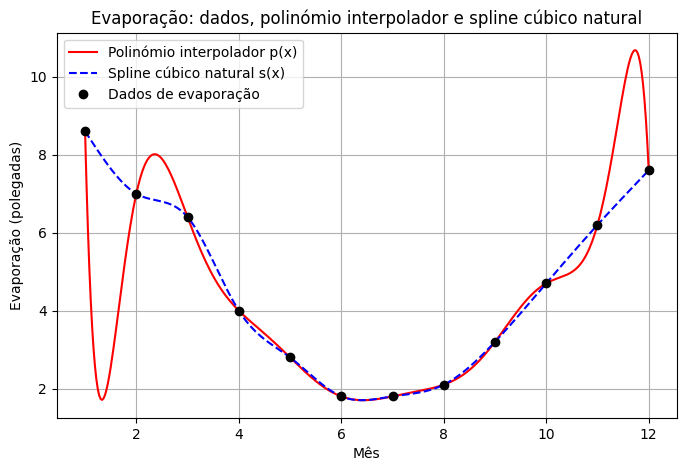

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Dados do enunciado (meses e evaporação) [file:2]
x_mes = np.arange(1, 13, dtype=float)  # 1,...,12
y_evap = np.array([8.6, 7.0, 6.4, 4.0, 2.8, 1.8, 1.8, 2.1, 3.2, 4.7, 6.2, 7.6])

# --- Polinómio interpolador p(x) por Newton (diferenças divididas) ---

m = len(x_mes)
DD = [[0.0 for _ in range(m)] for _ in range(m)]
for i in range(m):
    DD[i][0] = y_evap[i]

for j in range(1, m):
    for i in range(m - j):
        DD[i][j] = (DD[i+1][j-1] - DD[i][j-1]) / (x_mes[i+j] - x_mes[i])

coeffs_p = [DD[0][j] for j in range(m)]  # c0,...,c11

def p_interp(x):
    """Avalia o polinómio interpolador p(x) de grau <=11 em x."""
    value = 0.0
    term = 1.0
    for j in range(m):
        value += coeffs_p[j] * term
        term *= (x - x_mes[j])
    return value

# --- Spline cúbico natural s(x) nos 12 pontos ---

n = m - 1                    # 11 intervalos
h = np.diff(x_mes)           # aqui h_i = 1 para todos, mas escrevemos em geral

A = np.zeros((m, m))
b_vec = np.zeros(m)

# Condições naturais: M_1 = 0, M_12 = 0
A[0, 0] = 1.0
A[m-1, m-1] = 1.0
b_vec[0] = 0.0
b_vec[m-1] = 0.0

for i in range(1, m-1):
    hi = h[i-1]
    hi1 = h[i]
    A[i, i-1] = hi
    A[i, i]   = 2*(hi + hi1)
    A[i, i+1] = hi1
    b_vec[i]  = 6 * ((y_evap[i+1] - y_evap[i]) / hi1 - (y_evap[i] - y_evap[i-1]) / hi)

M = np.linalg.solve(A, b_vec)   # M[i] = s"(x_i)

# Coeficientes dos cúbicos S_i(x) em cada [x_i, x_{i+1}]
coefs_s = []
for i in range(n):
    hi = x_mes[i+1] - x_mes[i]
    a_i = y_evap[i]
    c_i = M[i] / 2.0
    d_i = (M[i+1] - M[i]) / (6.0 * hi)
    b_i = (y_evap[i+1] - y_evap[i]) / hi - (2*M[i] + M[i+1]) * hi / 6.0
    coefs_s.append((a_i, b_i, c_i, d_i))

def s_spline(x):
    """Avalia o spline cúbico natural s(x) nos dados de evaporação."""
    if x <= x_mes[0]:
        i = 0
    elif x >= x_mes[-1]:
        i = n-1
    else:
        i = np.searchsorted(x_mes, x) - 1
    a_i, b_i, c_i, d_i = coefs_s[i]
    dx = x - x_mes[i]
    return a_i + b_i*dx + c_i*dx**2 + d_i*dx**3

# --- Gráficos p(x), s(x) e pontos de dados ---

xs_plot = np.linspace(1, 12, 400)
p_vals = [p_interp(x) for x in xs_plot]
s_vals = [s_spline(x) for x in xs_plot]

plt.figure(figsize=(8, 5))
plt.plot(xs_plot, p_vals, 'r-', label='Polinómio interpolador p(x)')
plt.plot(xs_plot, s_vals, 'b--', label='Spline cúbico natural s(x)')
plt.plot(x_mes, y_evap, 'ko', label='Dados de evaporação')
plt.xlabel('Mês')
plt.ylabel('Evaporação (polegadas)')
plt.title('Evaporação: dados, polinómio interpolador e spline cúbico natural')
plt.legend()
plt.grid(True)
plt.show()


No nosso código de Python, os coeficientes $(c_0,\dots,c_{11})$ foram armazenados numa lista, e definimos uma função `pinterp(x)` que avalia diretamente $(p(x))$ usando o esquema de Horner adaptado à forma de Newton, o que torna a avaliação numérica mais eficiente e estável. Desta forma, todo o processo de construção e avaliação do polinómio interpolador é feito numericamente, sem recurso a bibliotecas de cálculo simbólico, seguindo a metodologia vista no capítulo das diferenças divididas.

Em seguida, utilizando o mesmo conjunto de 12 pontos, construímos o spline cúbico natural $(s(x))$. Considerou‑se um spline cúbico tal que, em cada subintervalo $([x_i,x_{i+1}])$, coincide com um polinómio cúbico
$$
S_i(x)=a_i+b_i(x-x_i)+c_i(x-x_i)^2+d_i(x-x_i)^3,\quad i=1,\dots,11,
$$
com continuidade de $(s)$, $(s')$ e $(s'')$ nos nós interiores e impondo ainda as condições naturais $(s''(x_1)=s''(x_{12})=0)$.

Para determinar o spline, montamos o sistema tridiagonal clássico para os valores $(M_i=s''(x_i))$, $(i=1,\dots,12)$, cujos coeficientes dependem dos espaçamentos $(h_i=x_{i+1}-x_i)$ e dos incrementos nos valores de $(f)$. Este sistema linear foi resolvido numericamente com `numpy.linalg.solve`, obtendo‑se os $(M_i)$ que garantem, simultaneamente, a continuidade da primeira derivada e a condição natural de anulamento da segunda derivada nos extremos do intervalo temporal.

A partir dos valores $(M_i)$, calcularam‑se então, para cada subintervalo $([x_i,x_{i+1}])$, os coeficientes $(a_i,b_i,c_i,d_i)$ das expressões padrão do spline cúbico natural, de acordo com as fórmulas teóricas estudadas nas aulas. No programa, estes coeficientes foram guardados numa lista e definímos uma função `sspline(x)` que, dado um mês $(x)$, identifica o intervalo correspondente e avalia o polinómio cúbico $(S_i(x))$, definindo assim $(s(x))$ em todo o intervalo $([1,12])$.

Por fim, representamos graficamente, no intervalo $(x\in[1,12])$, os dados experimentais, o polinómio interpolador $(p(x))$ e o spline cúbico natural $(s(x))$. O gráfico obtido permite uma comparação visual imediata entre os valores medidos e as duas aproximações interpolantes, ilustrando as diferenças de comportamento entre a interpolação polinomial global de alto grau e a interpolação polinomial segmentada por splines cúbicos naturais.

#### **(b)**

A partir do gráfico construído na alínea (a), observa‑se que o polinómio interpolador $(p(x))$ passa exatamente pelos 12 pontos de dados, como garante o teorema de existência e unicidade do polinómio interpolador de grau $(n)$ em $(n+1)$ pontos de abcissas distintas. No entanto, entre alguns meses o polinómio apresenta oscilações acentuadas e variações bruscas de concavidade, especialmente nas regiões em que os valores de evaporação mudam mais rapidamente, o que é um comportamento típico de polinómios de grau elevado sujeito ao chamado fenómeno de Runge.

Por outro lado, o spline cúbico natural $(s(x))$ fornece uma curva suave que se ajusta bem aos dados experimentais, acompanhando de forma gradual a descida da evaporação entre os meses de verão e inverno e o aumento posterior até ao final do ano. A curva do spline não introduz oscilações artificiais entre os nós, preservando melhor a forma global da série temporal e originando uma evolução sazonal mais regular e coerente com o comportamento físico do fenómeno em estudo.

Deste modo, conclui‑se que, para estes dados de evaporação, a aproximação mais aceitável é a fornecida pelo spline cúbico natural $(s(x))$, que combina a interpolação exata dos pontos com um comportamento muito mais estável entre os nós. Esta conclusão está em consonância com a motivação teórica para o uso de splines, onde se realça que, em muitos conjuntos de dados reais, os splines cúbicos naturais produzem aproximações mais fiáveis e realistas do que os polinómios globais de grau elevado, mitigando as grandes oscilações fora da vizinhança imediata dos dados.


## **Conclusão**

Neste trabalho estudamos as duas abordagens de interpolação, recorrendo a polinómios globais obtidos pelo método de Newton em diferenças divididas e a splines cúbicos naturais, aplicadas tanto a funções de teste como a dados reais de evaporação. Observamos que os polinómios de grau elevado podem introduzir oscilações significativas, sobretudo perto dos extremos do intervalo, enquanto os splines cúbicos naturais fornecem aproximações mais estáveis e visualmente mais próximas do comportamento esperado das funções e dos dados. A análise dos erros teóricos e numéricos confirmou estas conclusões, mostrando que, para muitos problemas práticos, os splines cúbicos naturais constituem uma alternativa mais fiável do que a interpolação polinomial global.